In [5]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob


import pylab as plt
from matplotlib.pyplot import get_cmap
%matplotlib inline  

src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir

pd.set_option("display.max_rows",10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [6]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 200  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = 1. # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl =1.8 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
          'text.fontsize': Ampl*8,
          'legend.fontsize': Ampl*6,
          'xtick.labelsize': Ampl*8,
          'ytick.labelsize': Ampl*8,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out'
         }
plt.rcParams.update(params)

x_bottom = 0.0
x_left = 0.2
x_right = 0.95
x_top = 0.8
x_h=0.15
x_w=0.2

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Plot

In [7]:

list_doms = ['N','E','O','A','C']
list_doms_labels = list_doms

fname_data = 'ipip300-no0_arr_qd_neoac_score-1.npy'
path_read = '../data_filter/'
filename= os.path.join(path_read,fname_data)
label = fname_data.split('.')

vmin=-1.
vmax=1.
cmapname = 'PuOr_r'



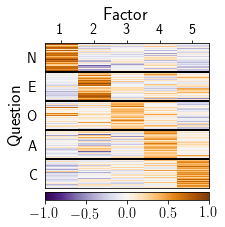

In [8]:

#########################################################
### Load question-loadings

arr_qd = np.load(filename)
Q,n_dim = np.shape(arr_qd)

arr_z = arr_qd

fig = plt.figure(figsize=fig_size)
plt.clf()
ax = fig.add_subplot(111)
# plt.title('Dimension - ')
im = ax.imshow(arr_z,vmin=vmin,vmax=vmax,cmap=get_cmap(cmapname),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,ticks=[-1,-0.5,0,0.5,1],orientation='horizontal',pad=0.02)


ax.set_xlabel('Factor')
ax.set_ylabel('Question')
q_labels = list_doms
list_yticks = np.arange(0,Q,Q/len(q_labels))  
if fname_data[:3]=='bbc':
    list_yticks = np.array([0,8,16,26,35])

for y in list_yticks[1:]:
    ax.plot([-0.5,n_dim-0.5],[y-0.5,y-0.5],lw=2,color='black')
list_yticks = list_yticks + (list_yticks[1]-list_yticks[0])/2
ax.set_yticks(list_yticks)
ax.set_yticklabels(q_labels)
ax.tick_params(axis='y',width=0)

ax.set_xticks( list(np.arange(5)) )
ax.set_xticklabels(  list(np.arange(5)+1) )
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')



plt.subplots_adjust(left=x_left,bottom=x_bottom,right=x_right,top=x_top,hspace=x_h,wspace=x_w)
